## Customer Churn Analysis

### Problem Statement:

   Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

   Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

   Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

   You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [3]:
pd.set_option('display.max_columns',None) 
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
#We have 31 Columns so Lets sort Columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

- We have 7043 Rows and 21 Columns in this Telecom Dataset.
- We have target Variable 'Churn' with object datatype, leading this to classification problem.
- There is interesting entry here under object datatype which is 'TotalCharges'. This feature is numerical in nature but categories as Object datatypes. This implies that there is presence of string variable in this column or might be data error.
- 'SeniorCitizen' is categorical variable listed as Numerical variable. So we gone convert it into object datatype.
- At end we have 3 Numerical variable and 18 categorical variable. Out of which 'CustomerID' is unnecessary variable from our analytical & modelling viewpoint. We will drop 'CustomerID' column.


#### We are going to Group Variable into Numerical and Categorical variables list in order to simplify further analysis. Next thing is droping CustomerID Column.

In [5]:
df.drop(['customerID'],axis=1,inplace=True)

In [6]:
# spliting into Numerical & Categorical 
Categorical = [ 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod','SeniorCitizen', 'Churn']
Numerical = ['tenure','MonthlyCharges','TotalCharges']

### Statistical Analysis

Before Going for Statistical exploration of data, first check integrity of data & Missing value

### Data Integrity Check
Since dataset is large, Let check for any entry which is repeated or duplicated in dataset.

In [7]:
df.duplicated().sum() #check the duplicate data

22

- We can see that 22 duplicate entry in dataset. Let drop duplicated entry from dataset.

In [8]:
df.drop_duplicates(keep='last',inplace= True)
df.shape

(7021, 20)

- Now check for any whitespaces, NA,'-' in dataset. We might find something in TotalCharges column by considering Object datatype

In [9]:
df.isin([' ','NA','-']).sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- There is possibility of whitespaces in TotalCharges column. lets deal with it

In [10]:
df['TotalCharges'].isin([' ']).sum().any()

True

In [11]:
# Replaceing Whitespaces with null values
df['TotalCharges']= df['TotalCharges'].replace(' ',np.nan)

In [12]:
# Converting object datatype into float
df['TotalCharges']= df['TotalCharges'].astype(float)

- We have removed whitespaces so let now check for missing values

In [13]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))
                 

                  Missing Values  % Missing data
TotalCharges                  11        0.156673
gender                         0        0.000000
SeniorCitizen                  0        0.000000
MonthlyCharges                 0        0.000000
PaymentMethod                  0        0.000000
PaperlessBilling               0        0.000000
Contract                       0        0.000000
StreamingMovies                0        0.000000
StreamingTV                    0        0.000000
TechSupport                    0        0.000000
DeviceProtection               0        0.000000
OnlineBackup                   0        0.000000
OnlineSecurity                 0        0.000000
InternetService                0        0.000000
MultipleLines                  0        0.000000
PhoneService                   0        0.000000
tenure                         0        0.000000
Dependents                     0        0.000000
Partner                        0        0.000000
Churn               

- We can impute missing value in TotalCharges either with mean and median. We can decide imputation method after checking distribution and Outliers in data

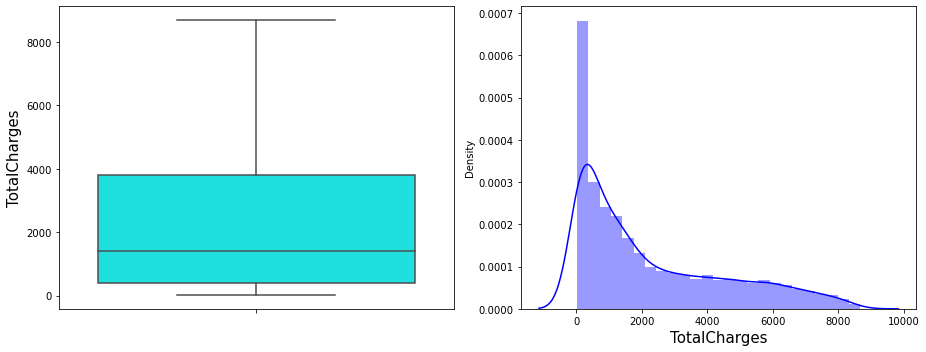

In [14]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.boxplot(y='TotalCharges', data=df,color='cyan')
plt.ylabel('TotalCharges',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['TotalCharges'], color='b')
plt.xlabel('TotalCharges',fontsize=15)
plt.tight_layout()
plt.show()

In [15]:
print("Mean of TotalCharges:",df['TotalCharges'].mean())
print("Median of TotalCharges:",df['TotalCharges'].median())

Mean of TotalCharges: 2290.353388017122
Median of TotalCharges: 1403.875


- We can see that Outliers doesnot exist, so no mean sensitivity issue present here.
- Distribution plot shows that Total Charges feature is right skewed.
- Mean is greater than Median.

#### Considering above observation we can impute Missing value with Mean.

### Imputation of Missing value in TotalCharges with Mean

In [16]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

### Checking for Null values after Imputation

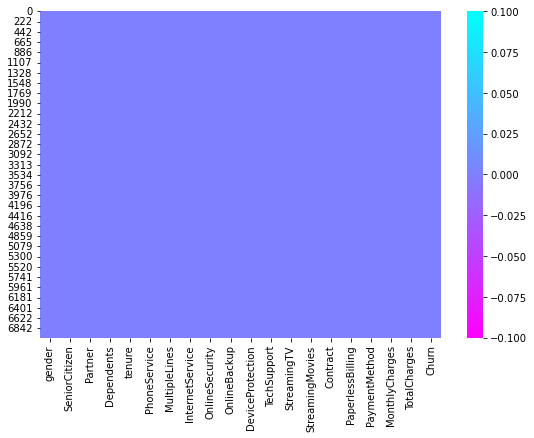

In [17]:
plt.figure(figsize=(9,6))
sns.heatmap(df.isnull(),cmap="cool_r")
plt.show()

- Finally, No Missing Value is Present.

### Statistical Matrix

In [18]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7021.000000,0.162512,0.368947,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,7021.000000,32.469449,24.534965,0.000000,9.000000,29.000000,55.000000,72.000000
MonthlyCharges,7021.000000,64.851894,30.069001,18.250000,35.750000,70.400000,89.900000,118.750000
TotalCharges,7021.000000,2290.353388,2265.044136,18.800000,411.150000,1410.250000,3801.700000,8684.800000


In [19]:
df[Categorical].describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7021.0,0.162512,0.368947,0.0,0.0,0.0,0.0,1.0


- The best way to avoid customer churn is to know your customers, and the best way to know your customer is through historical and new customer data.

Start with Enlisting Value counts & Sub-categories of different categorial features available

In [20]:
for i in Categorical:
    print(i)
    print(df[i].value_counts())
    print("="*100)

gender
Male      3541
Female    3480
Name: gender, dtype: int64
Partner
No     3619
Yes    3402
Name: Partner, dtype: int64
Dependents
No     4911
Yes    2110
Name: Dependents, dtype: int64
PhoneService
Yes    6339
No      682
Name: PhoneService, dtype: int64
MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64
OnlineSecurity
No                     3490
Yes                    2019
No internet service    1512
Name: OnlineSecurity, dtype: int64
OnlineBackup
No                     3080
Yes                    2429
No internet service    1512
Name: OnlineBackup, dtype: int64
DeviceProtection
No                     3087
Yes                    2422
No internet service    1512
Name: DeviceProtection, dtype: int64
TechSupport
No                     3465
Yes                    2044
No internet service    1512
Name: T

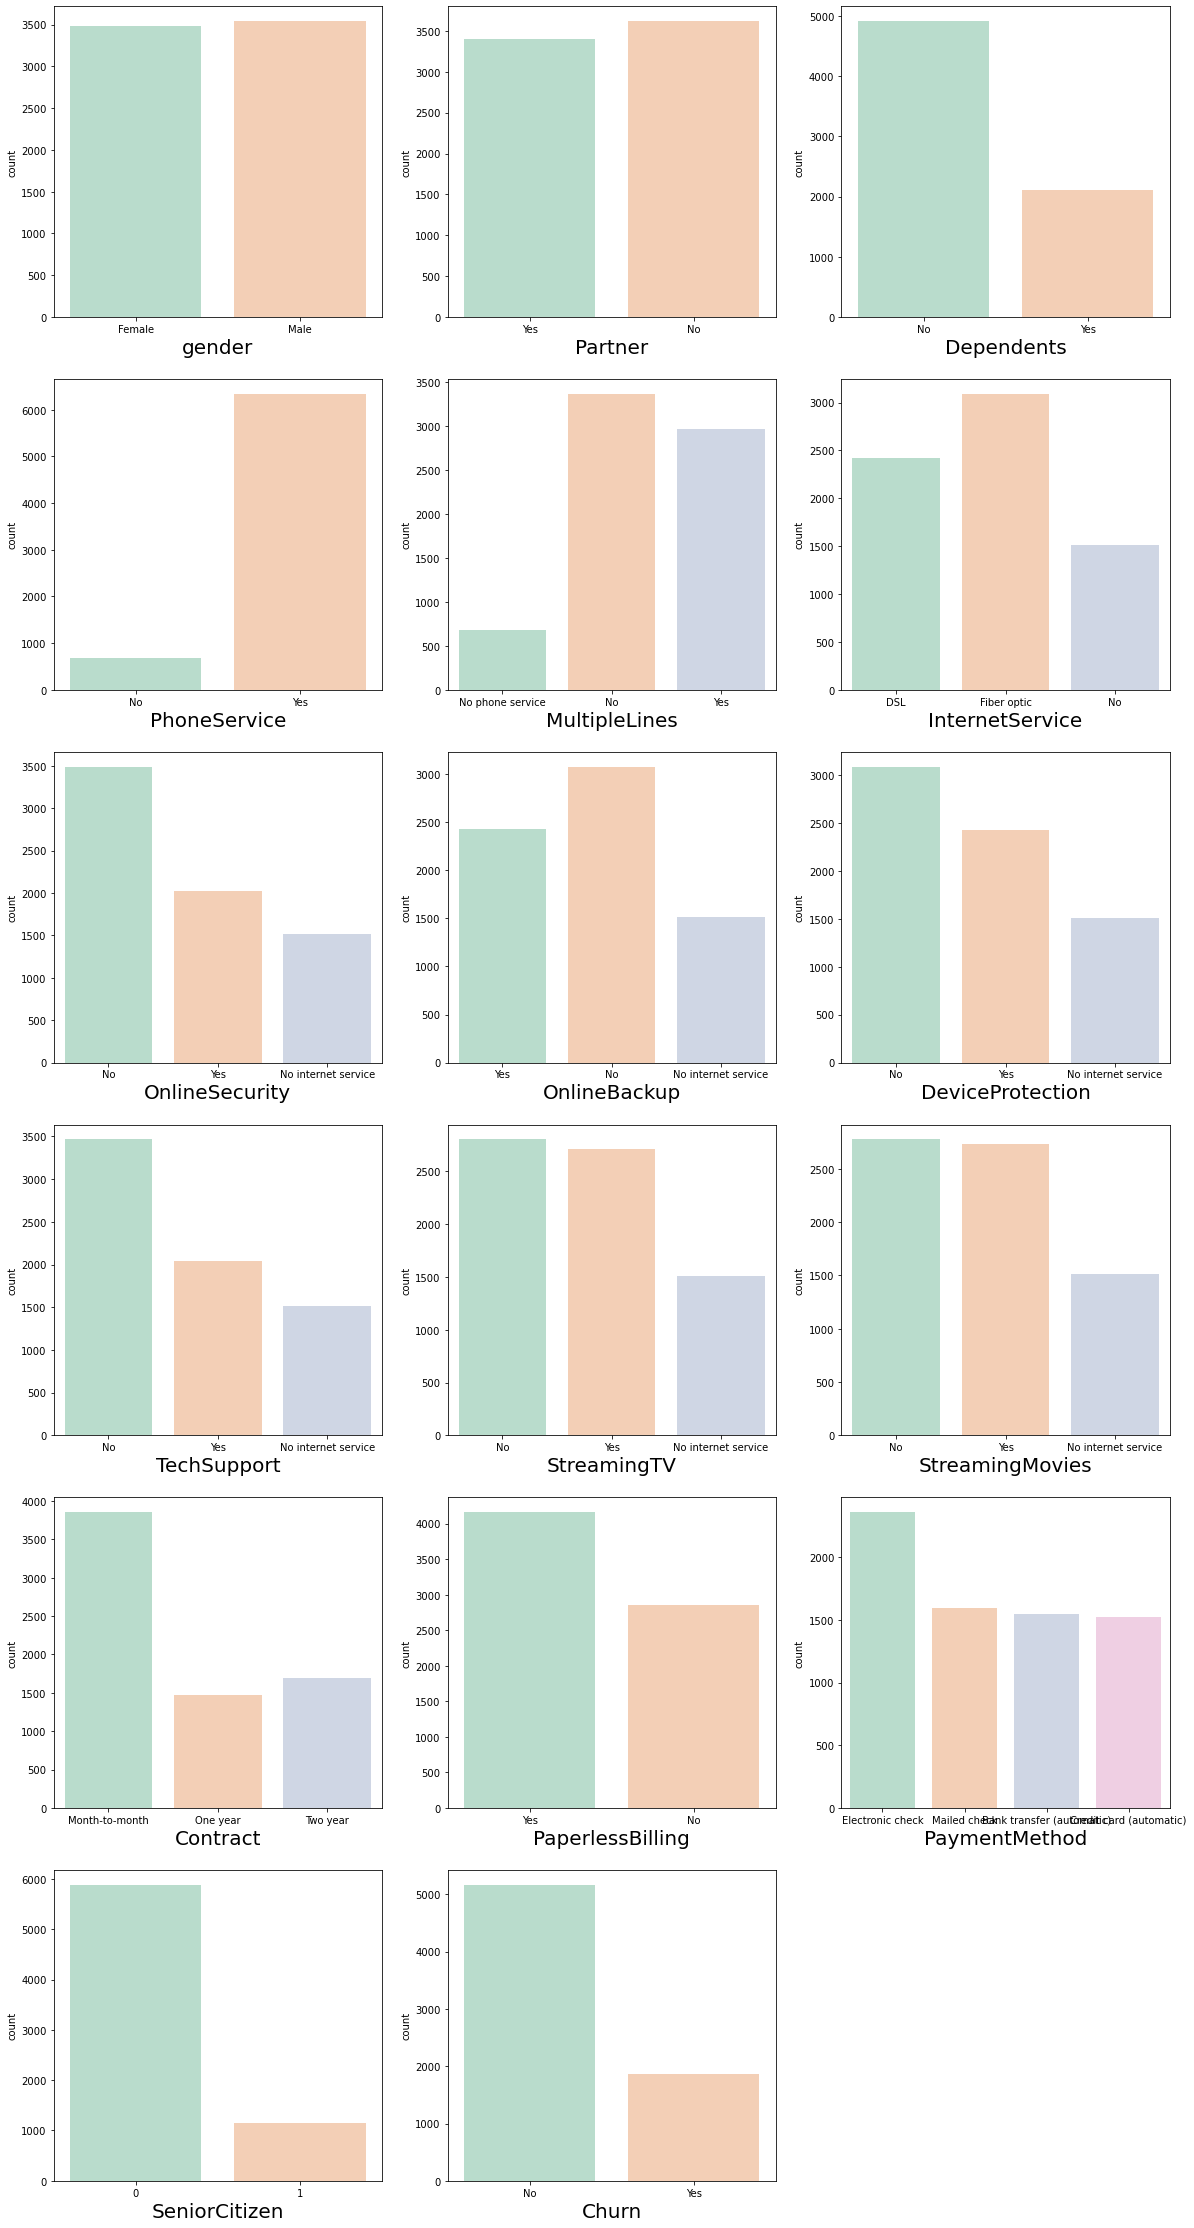

In [21]:
sns.set_palette('Pastel2')
plt.figure(figsize=(20,40), facecolor='white')
plotnumber =1
for i in Categorical:
    if plotnumber <=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

- Now Start exploreing feature one by one, begin with Target Feature

### Target Variable Churn

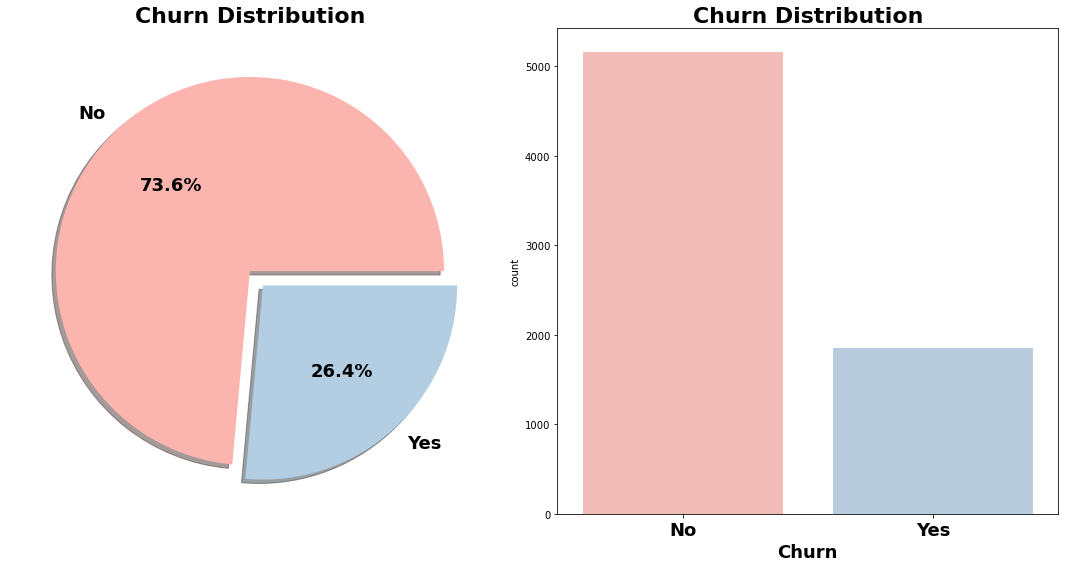

In [22]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Pastel1')
f,ax=plt.subplots(1,2,figsize=(15,8))
df['Churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Churn Distribution', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Churn',data=df,ax=ax[1])
ax[1].set_title('Churn Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Churn",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

- 26.4 % Customer choose to churn service in last month. Which is quite high number.This all leads to imbalanced data case as churn is our target variable.

#### Let start exploration of Independent feature to figure where customer are unstatisfied and what are customers need or inclination in cutting edge competition.

### Gender vs Churn 

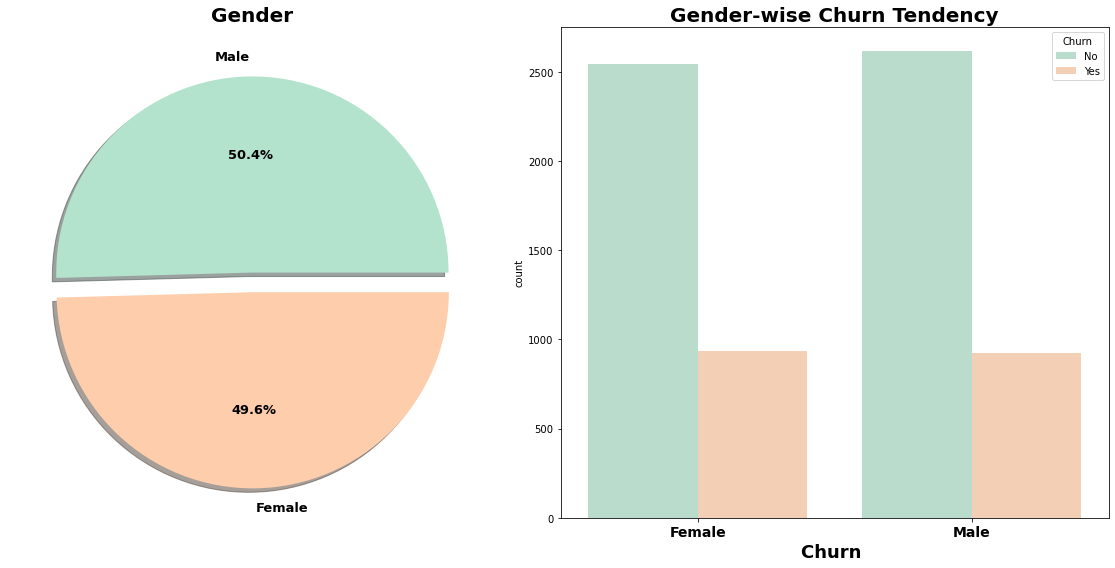

In [23]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Pastel2')
fig,ax=plt.subplots(1,2,figsize=(16,8))
df['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Gender', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('gender',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Gender-wise Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Churn ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [24]:
pd.crosstab(df['gender'],df["Churn"],margins=True).style.background_gradient(cmap='summer_r')


Churn,No,Yes,All
gender,,,
Female,2546,934,3480
Male,2618,923,3541
All,5164,1857,7021


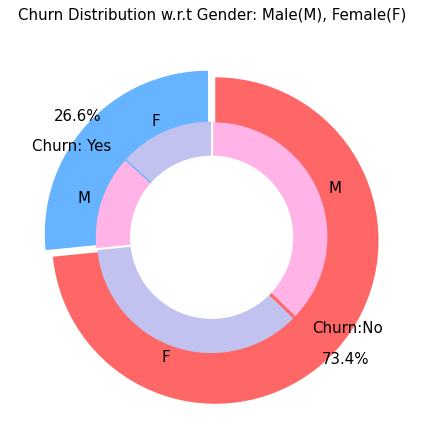

In [25]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#66b3ff', '#ff6666']
colors_gender = ['#c2c2f0', '#ffb3e6','#c2c2f0', '#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

- Data contain both gender almost in same proportion with minor difference.
- Both gender have tendency of attrition in same percentage.

#### Next Investigate Senior Citizen vs Gender Wise Churn Tendency

#### Lets see how many of them are Senior Citizen and Churn tendency in senior citizen

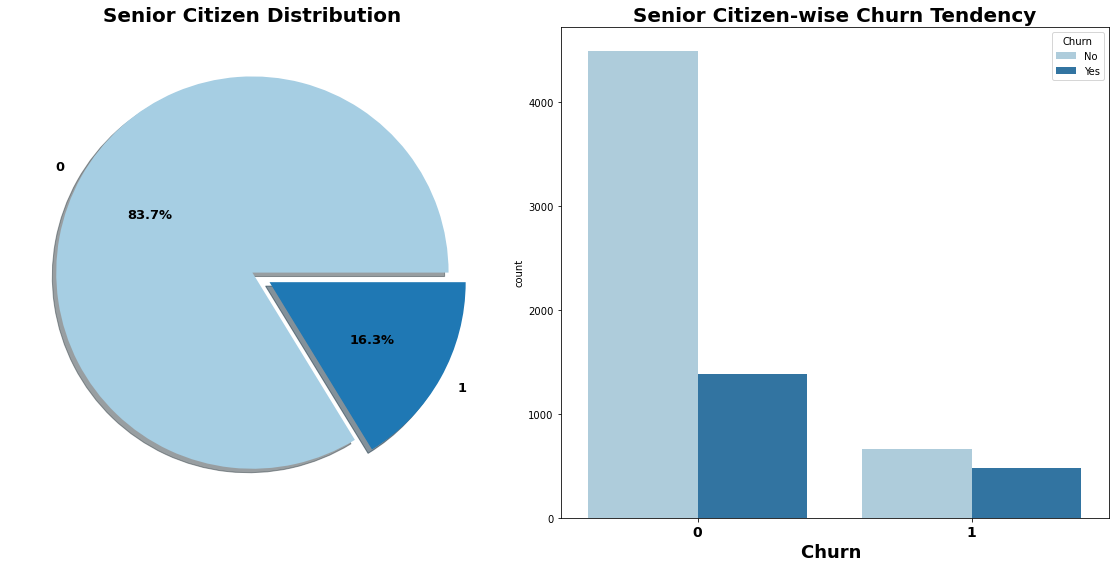

In [26]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Paired')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['SeniorCitizen'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Senior Citizen Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('SeniorCitizen',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Senior Citizen-wise Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Churn ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

- There are only 16.3 % of the customers who are senior citizens. Thus most of our customers in the data are younger people.

In [27]:
pd.crosstab([df.gender,df.SeniorCitizen],df["Churn"],margins=True).style.background_gradient(cmap='summer_r')


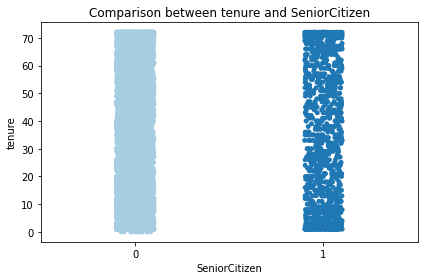

In [28]:
# Comparing tenure and SeniorCitizen
plt.title("Comparison between tenure and SeniorCitizen")
sns.stripplot(x = "SeniorCitizen",y="tenure",data = df)
plt.show()

- Around 16% customer are Senior citizen and form countplot we can see they have more tendency to churn.

- There is no significant relation between Senior Citizen and Tenure.

### Effect of Partner and Dependents on Churn

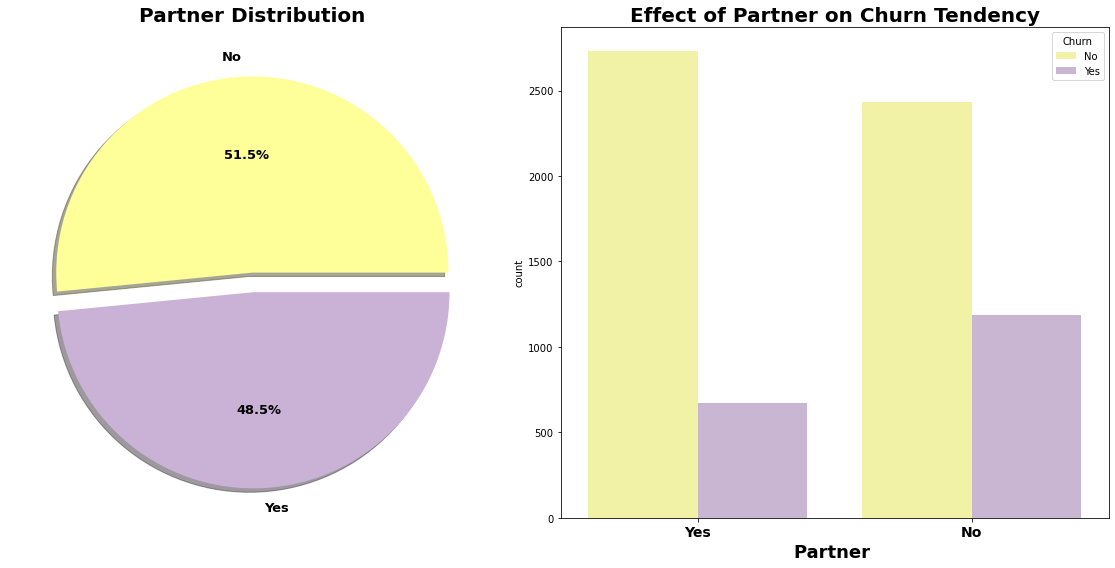

In [29]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Paired_r')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Partner'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Partner Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Partner',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Partner on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Partner ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

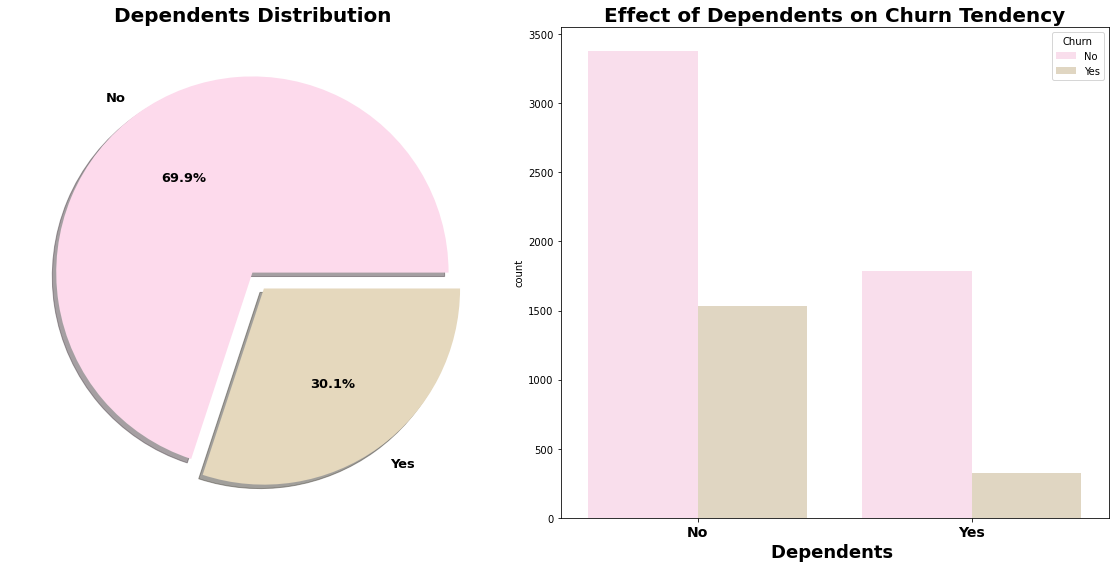

In [30]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Pastel1_r')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Dependents'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Dependents Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Dependents',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Dependents on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Dependents ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

- Customer having Partner have less tendency to Churn.
- Almost 30% Customer have dependents on them and they also have less - - tendency to churn compare to remaining 70%

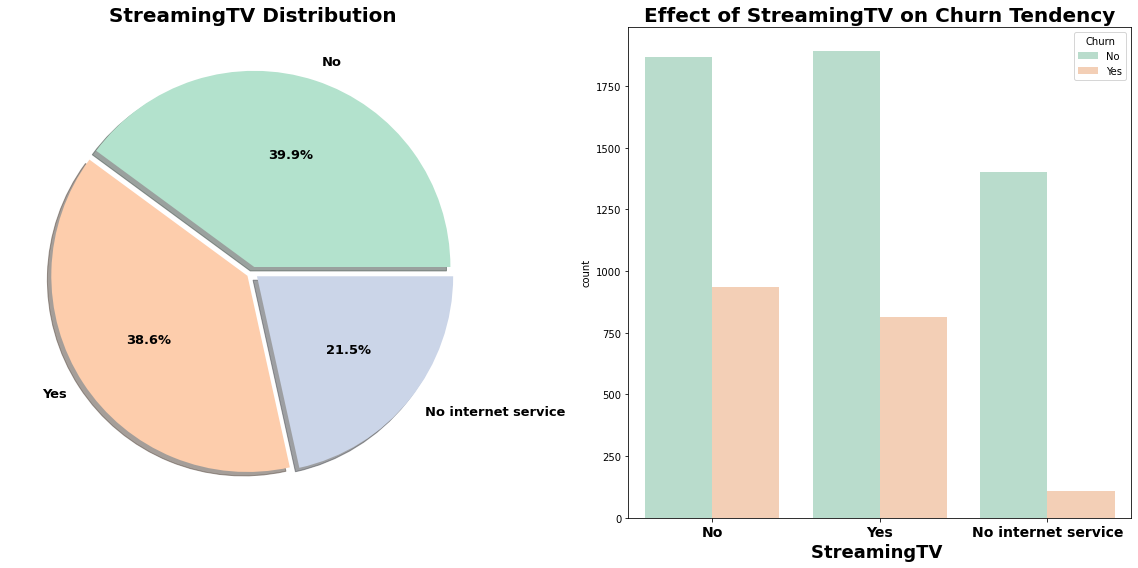

In [31]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Pastel2')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['StreamingTV'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('StreamingTV Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('StreamingTV',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of StreamingTV on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("StreamingTV ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

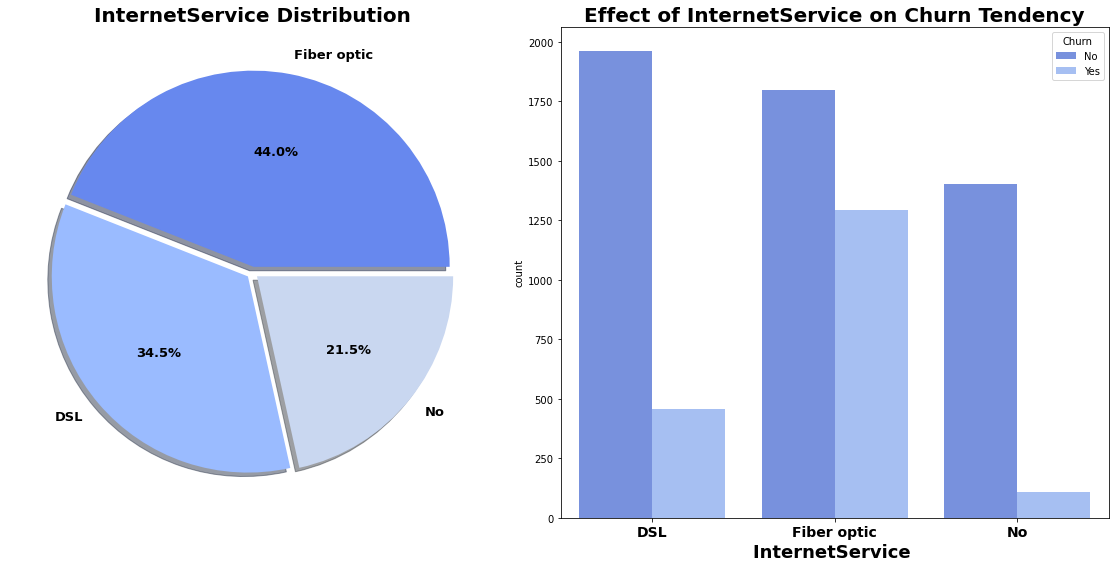

In [32]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('coolwarm')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['InternetService'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('InternetService Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('InternetService',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of InternetService on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("InternetService ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

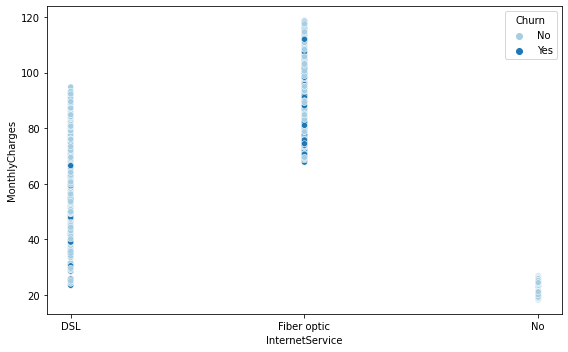

In [33]:
plt.figure(figsize=(8,5))
sns.set_palette('Paired')
sns.scatterplot(x="InternetService", y='MonthlyCharges',data=df,hue="Churn")
plt.show()

- 44% Customer perfer Fibre optic as Interent service and surpringly we can find high churn rate among them.
- We can find high monthly charges among customer using fiber optic compare to DSL. We can conclude that High charges is reason of customer churn.

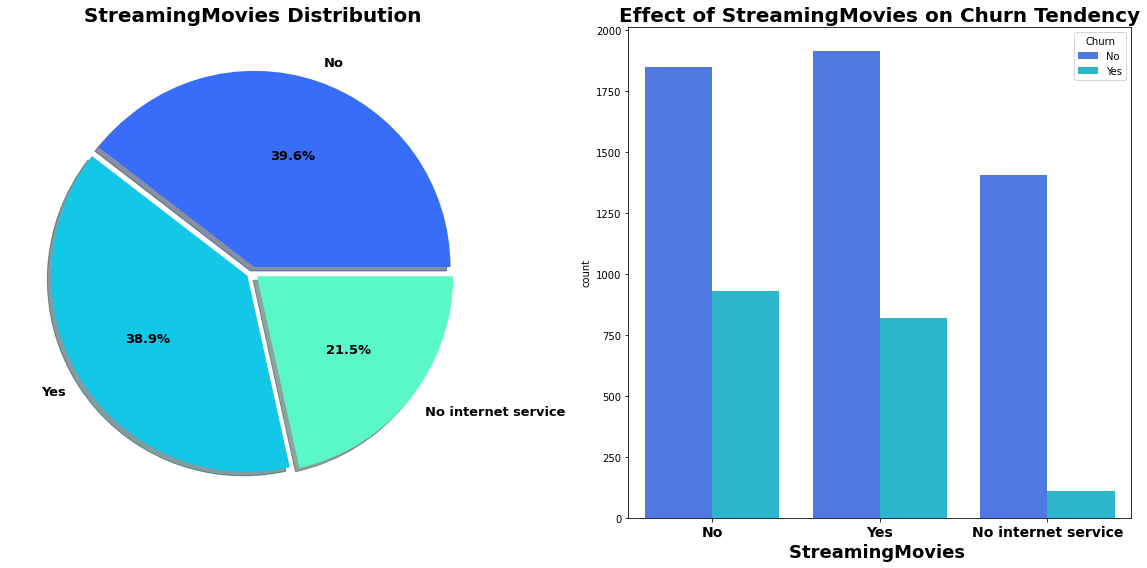

In [34]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['StreamingMovies'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('StreamingMovies Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('StreamingMovies',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of StreamingMovies on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("StreamingMovies ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

- Almost same churn tendency in people streaming movies and not.

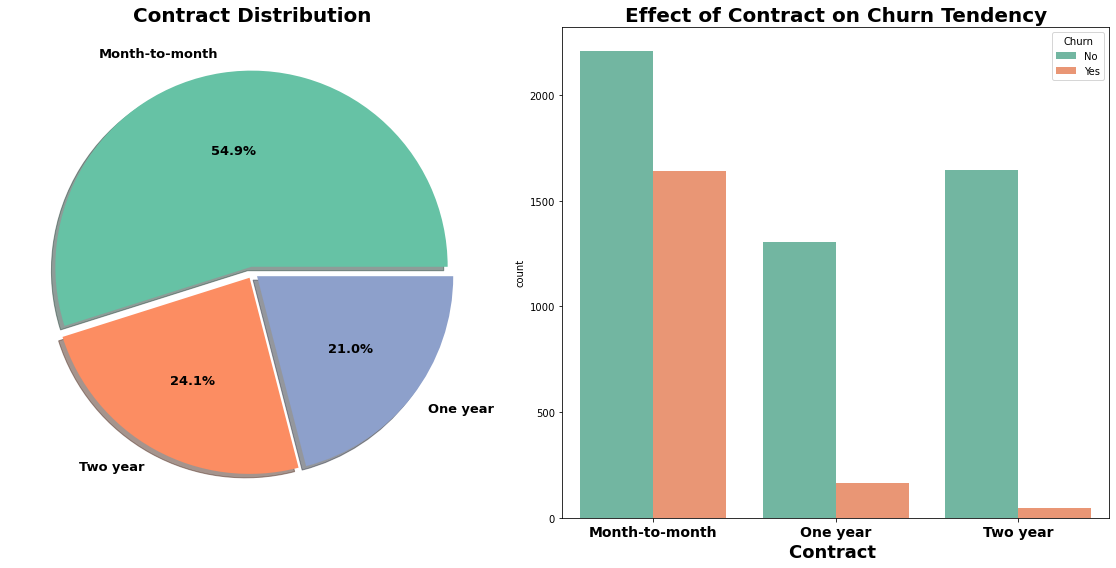

In [35]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Contract'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Contract Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Contract',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Contract on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Contract ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

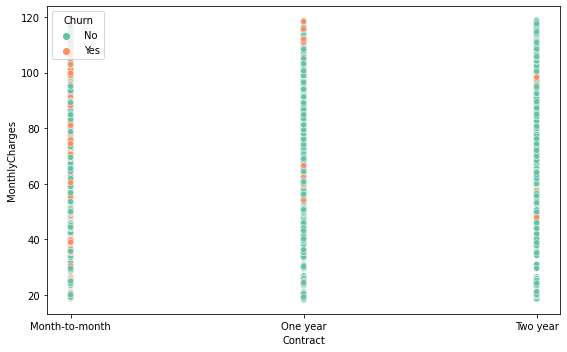

In [36]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Contract", y='MonthlyCharges',data=df,hue="Churn")
plt.show()

- Almost 55% customer perfer month to month contract compare to other.We also find high churn rate in these customer.

- We did not find any relation between Monthly charges and contract tenure.

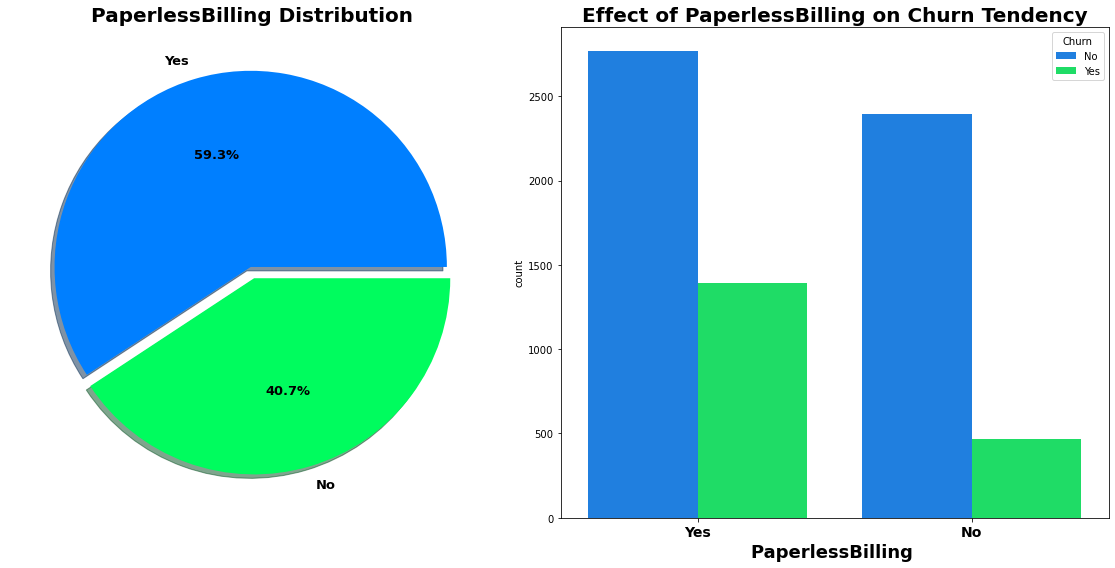

In [37]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gist_ncar')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['PaperlessBilling'].value_counts().plot.pie(explode=[0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('PaperlessBilling Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('PaperlessBilling',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of PaperlessBilling on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("PaperlessBilling ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

- 60% Customer perfer paperless billing.

- The customers who prefer paperless billing they have high churn rate.

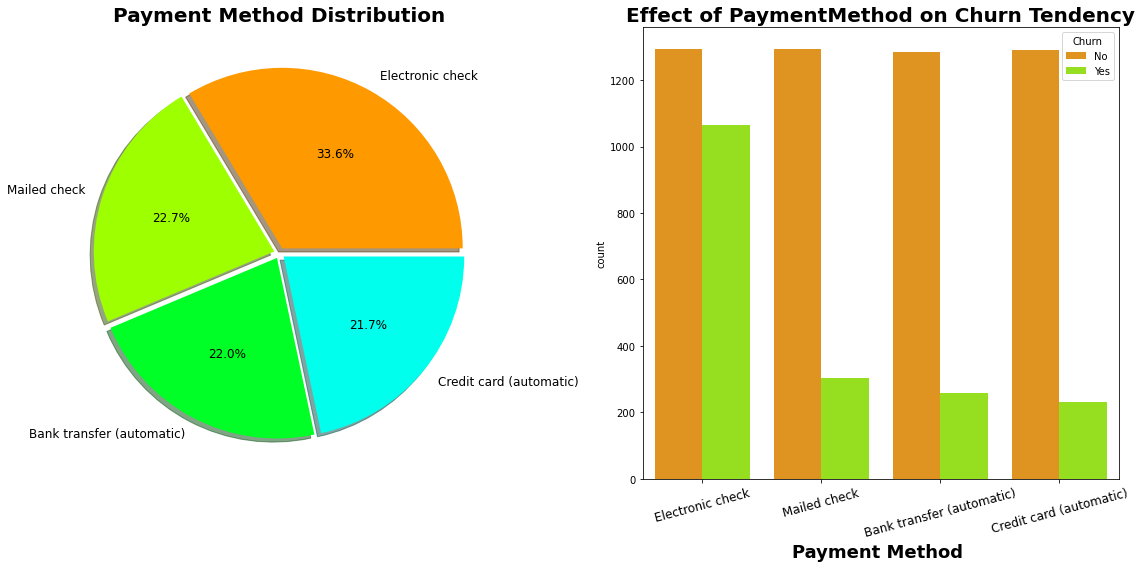

In [38]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gist_rainbow')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['PaymentMethod'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontsize':12}, ax=ax[0],shadow=True)
ax[0].set_title('Payment Method Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('PaymentMethod',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of PaymentMethod on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Payment Method ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=12,rotation=15)
plt.tight_layout()
plt.show()

- We can see high Attrition tendency in customer who pay by Electronic check.

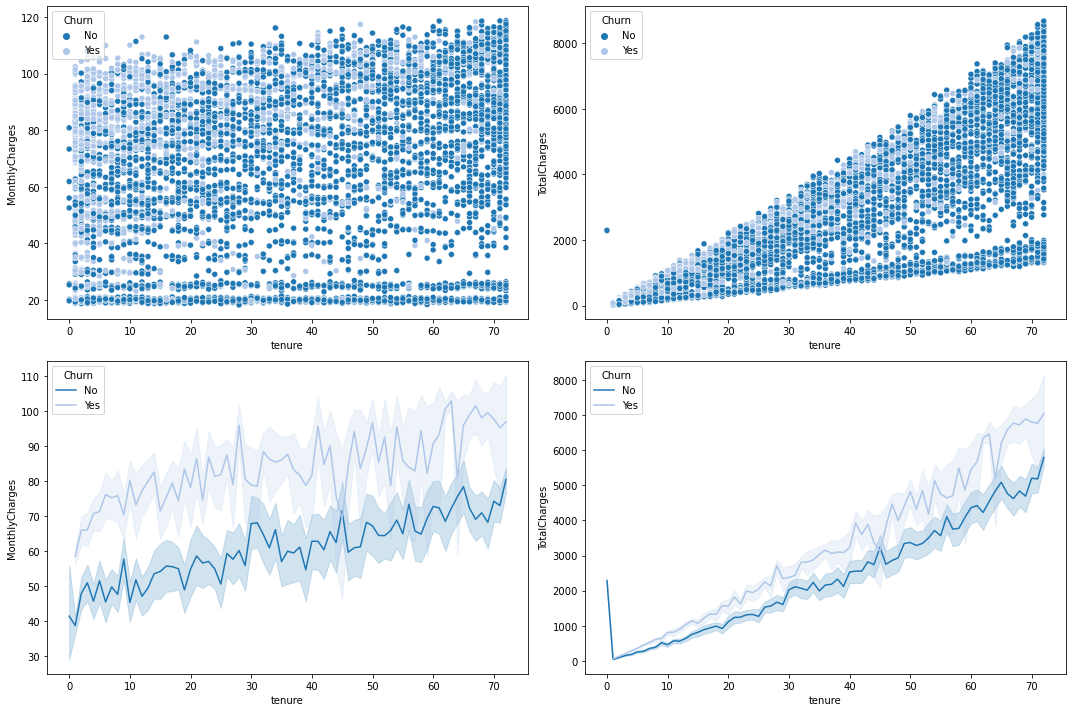

In [39]:
sns.set_palette('tab20')
fig , ax=plt.subplots(2,2, figsize=(15,10))
for i,col in enumerate(["MonthlyCharges","TotalCharges"]):
    sns.scatterplot(ax=ax[0,i],x="tenure", y=col,data=df,hue="Churn")
    sns.lineplot(ax=ax[1,i],x="tenure", y=col,data=df,hue="Churn")

- High Monthly Charges in customer who choose churn compare to rest.
- Same goes with High Total Charges in customer who choose churn compare to rest.

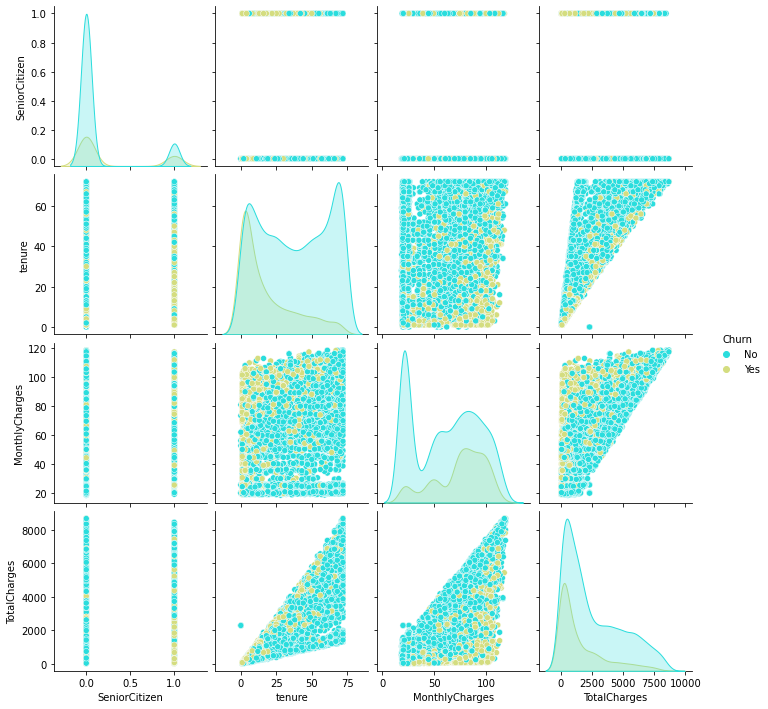

In [40]:
sns.pairplot(df,hue="Churn",palette="rainbow")
plt.show()

### Encoding categorical data

In [41]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges', 'TotalCharges'], object: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']}

In [42]:
Numerical =['tenure','MonthlyCharges', 'TotalCharges']

In [43]:
Category =['gender', 'Partner','PhoneService', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 
           'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [44]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


## Feature selection and Engineering


### Outliers Detection and Removal

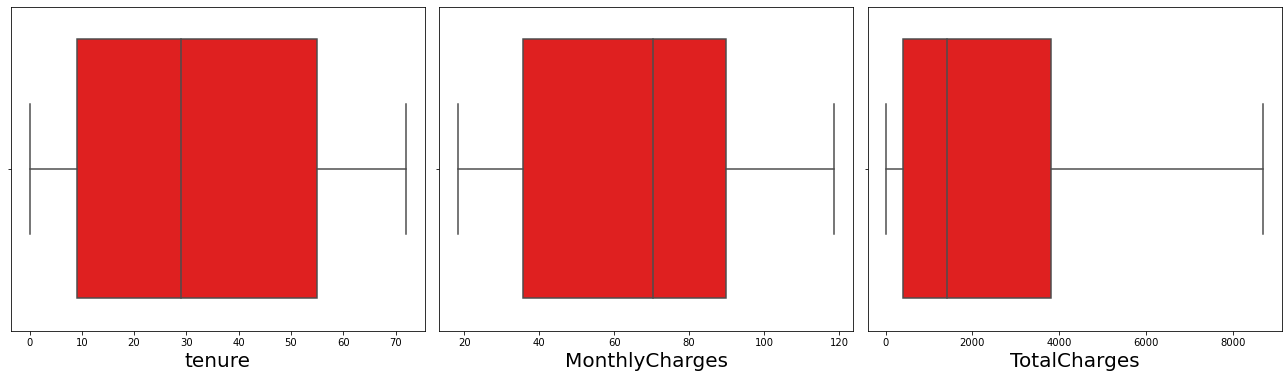

In [45]:
plt.figure(figsize=(18,10),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- From Boxplot we can see No outliers exist dataset.

In [46]:
df.drop(['PhoneService'],axis=1,inplace=True)

### Skewness of features

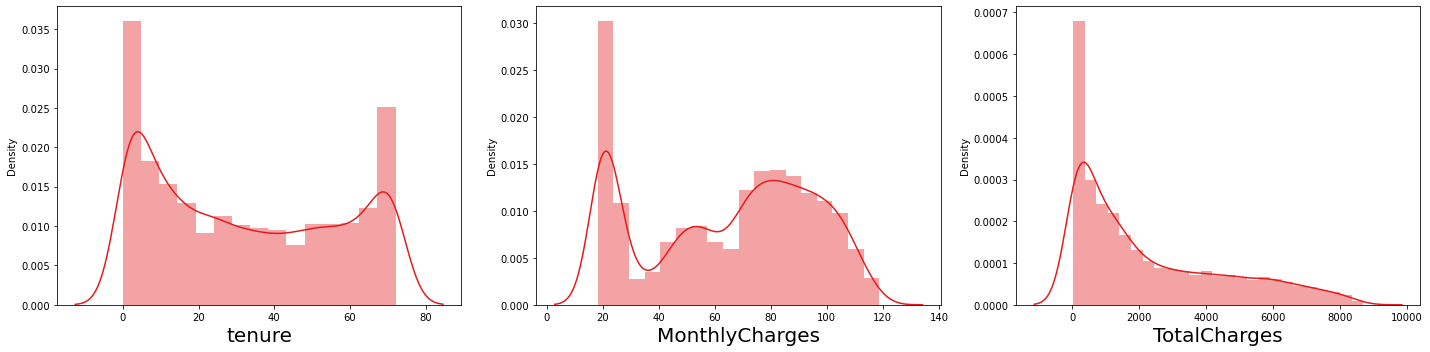

In [47]:
plt.figure(figsize=(20,5),facecolor='white')
sns.set_palette('Set1')
plotnum=1
for col in Numerical:
    if plotnum<=3:
        plt.subplot(1,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

- Skewness is important feature for continous data.

There is no relevence of skweness for discrete numerical feature like month and categorical feature.So we gone ignore skewness present in discrete numerical and categorical feature.

In [48]:
df.skew()

gender             -0.017381
SeniorCitizen       1.829987
Partner             0.061857
Dependents          0.870322
tenure              0.235542
MultipleLines       0.112816
InternetService     0.208589
OnlineSecurity      0.416182
OnlineBackup        0.181338
DeviceProtection    0.185268
TechSupport         0.401511
StreamingTV         0.026366
StreamingMovies     0.012488
Contract            0.626004
PaperlessBilling   -0.377214
PaymentMethod      -0.166267
MonthlyCharges     -0.224097
TotalCharges        0.959073
Churn               1.068139
dtype: float64

- tenure','MonthlyCharges', 'TotalCharges' are continous numerical feature in dataset.

- Out of which TotalCharges is skewed in nature. Which we gone transform here.

In [49]:
df['TotalCharges'] = np.log1p(df['TotalCharges'])

### Corrleation

In [50]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001125,-0.001014,0.011081,0.006185,-0.005939,-0.001762,-0.015262,-0.012182,0.000449,-0.007045,-0.006461,-0.008781,0.000811,-0.011350,0.016304,-0.013158,-0.003978,-0.008763
SeniorCitizen,-0.001125,1.000000,0.015553,-0.212115,0.015349,0.145521,-0.031221,-0.128267,-0.013675,-0.021448,-0.151349,0.030704,0.047209,-0.143624,0.156196,-0.037320,0.219434,0.098885,0.151619
Partner,-0.001014,0.015553,1.000000,0.451659,0.377346,0.139827,0.003667,0.150589,0.152518,0.165752,0.126422,0.136443,0.128635,0.293042,-0.015776,-0.152069,0.094301,0.335572,-0.149135
Dependents,0.011081,-0.212115,0.451659,1.000000,0.157603,-0.027083,0.046608,0.151984,0.090502,0.080015,0.133303,0.046140,0.020525,0.241912,-0.112220,-0.038185,-0.116191,0.091748,-0.163459
tenure,0.006185,0.015349,0.377346,0.157603,1.000000,0.340458,-0.026847,0.325762,0.370824,0.371062,0.323197,0.288737,0.296225,0.670728,0.005053,-0.367827,0.245251,0.831474,-0.351508
MultipleLines,-0.005939,0.145521,0.139827,-0.027083,0.340458,1.000000,-0.106819,0.006599,0.116625,0.121633,0.010909,0.174225,0.180113,0.108553,0.164814,-0.174073,0.432246,0.433967,0.040175
InternetService,-0.001762,-0.031221,0.003667,0.046608,-0.026847,-0.106819,1.000000,-0.029421,0.035736,0.044563,-0.027019,0.107508,0.098435,0.102456,-0.137056,0.082669,-0.320525,-0.199000,-0.047366
OnlineSecurity,-0.015262,-0.128267,0.150589,0.151984,0.325762,0.006599,-0.029421,1.000000,0.184211,0.175061,0.284255,0.043553,0.054847,0.374556,-0.157024,-0.096968,-0.053347,0.223633,-0.288505
OnlineBackup,-0.012182,-0.013675,0.152518,0.090502,0.370824,0.116625,0.035736,0.184211,1.000000,0.186760,0.194841,0.146071,0.135587,0.280658,-0.012565,-0.124724,0.120391,0.311785,-0.194214
DeviceProtection,0.000449,-0.021448,0.165752,0.080015,0.371062,0.121633,0.044563,0.175061,0.186760,1.000000,0.239738,0.275710,0.287869,0.350077,-0.037485,-0.135664,0.164399,0.332567,-0.176770


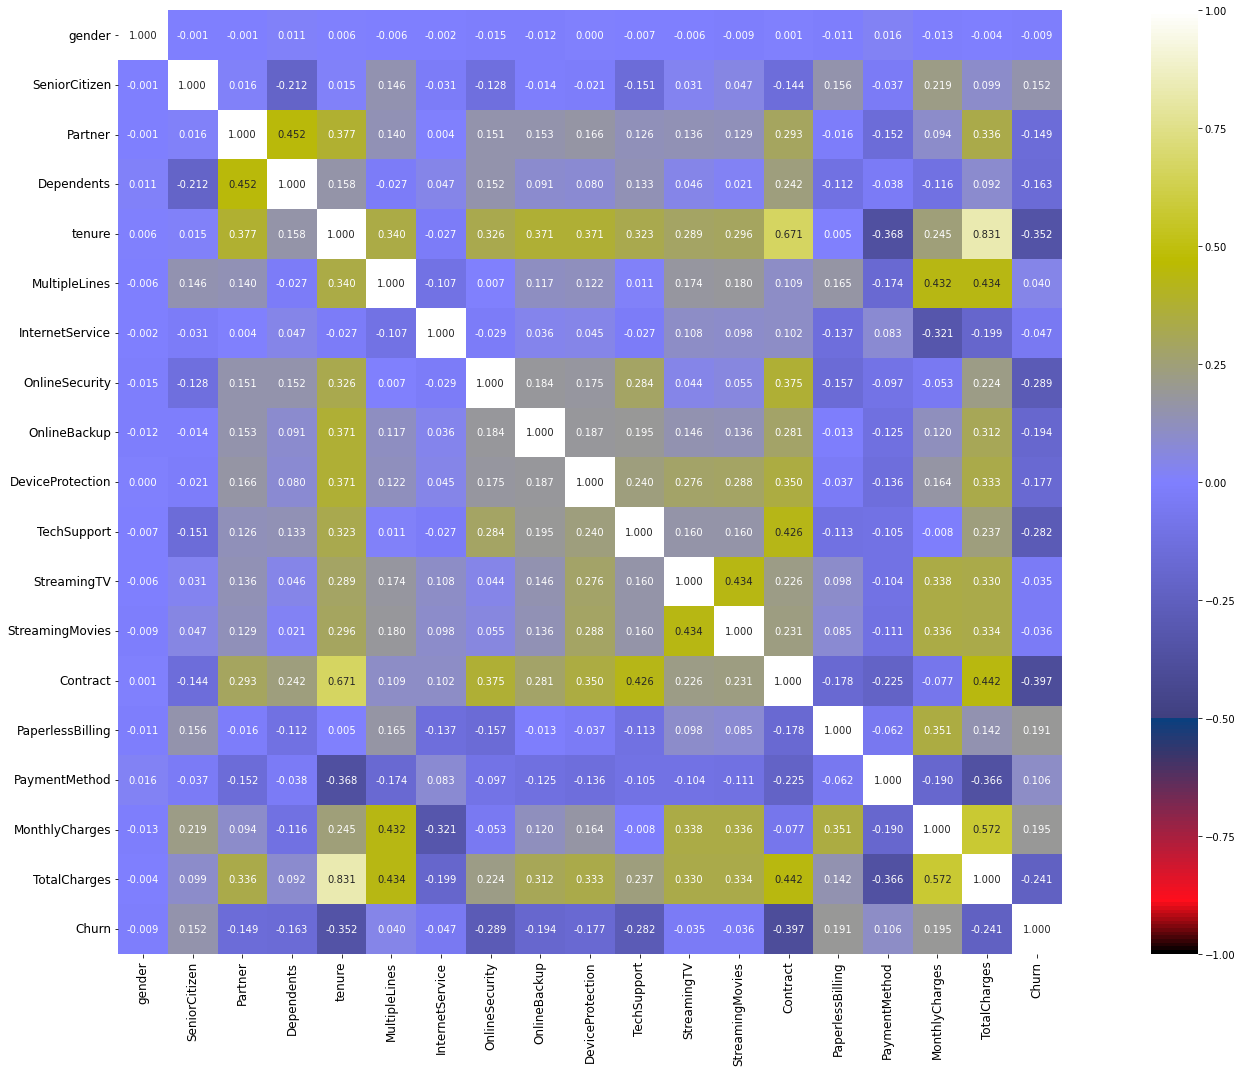

In [51]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

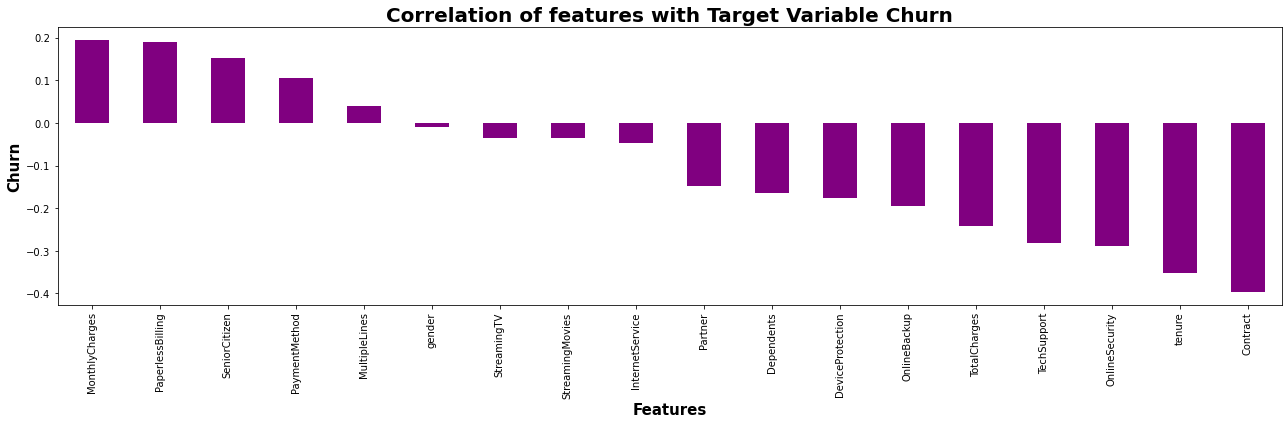

In [52]:
plt.figure(figsize = (18,6))
df.corr()['Churn'].drop(['Churn']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Churn',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Churn',fontsize = 20,fontweight='bold')
plt.show()

### Balanceing Imbalanced target feature

In [53]:
df.Churn.value_counts()

0    5164
1    1857
Name: Churn, dtype: int64

- As Target variable data is Imbalanced in nature we will need to balance target variable

### Balancing using SMOTE

In [54]:
from imblearn.over_sampling import SMOTE

In [55]:
# Splitting data in target and dependent feature
X = df.drop(['Churn'], axis =1)
Y = df['Churn']

In [56]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [57]:
Y.value_counts()

0    5164
1    5164
Name: Churn, dtype: int64

- We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.

### Standard Scaling

In [58]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

### Checking Multicollinearity between features using variance_inflation_factor

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.014421,gender
1,1.093658,SeniorCitizen
2,1.536176,Partner
3,1.425785,Dependents
4,6.428108,tenure
5,1.365024,MultipleLines
6,1.176418,InternetService
7,1.327789,OnlineSecurity
8,1.236175,OnlineBackup
9,1.316296,DeviceProtection


- Independent feature VIF is within permissible limit of 10

### PCA

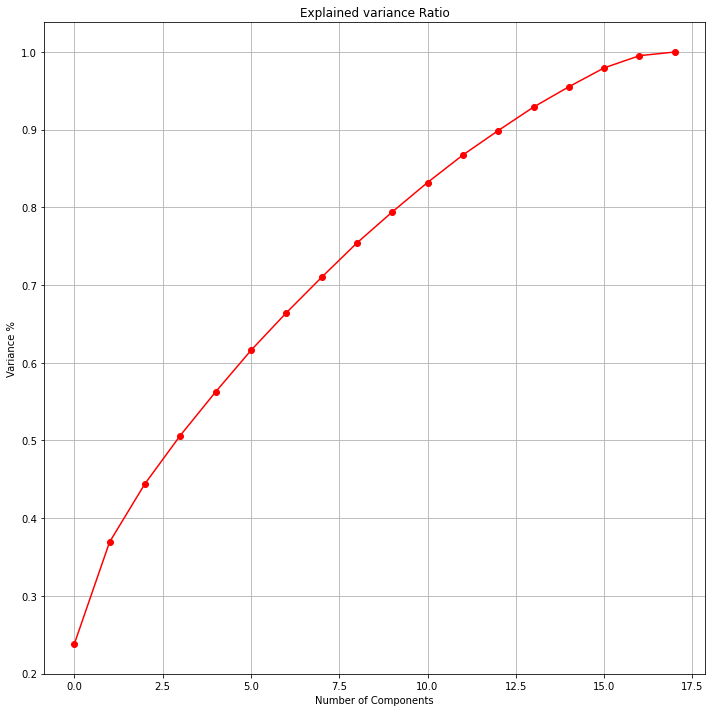

In [60]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

- AS per the graph, we can see that 13 principal components attribute for 90% of variation in the data. We shall pick the first 13 components for our prediction

In [61]:
pca_new = PCA(n_components=13)
x_new = pca_new.fit_transform(X_scale)


In [62]:
principle_x=pd.DataFrame(x_new,columns=np.arange(13))

### Machine Learning Model Building

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score


In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (7229, 13)
Training target vector size: (7229,)
Test feature matrix size: (3099, 13)
Test target vector size: (3099,)


### Finding best Random state

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8102613746369797 on Random_state 147


In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=147, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8102613746369797


Confusion matrix of Logistics Regression : 
 [[1154  363]
 [ 225 1357]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.84      0.76      0.80      1517
           1       0.79      0.86      0.82      1582

    accuracy                           0.81      3099
   macro avg       0.81      0.81      0.81      3099
weighted avg       0.81      0.81      0.81      3099



### Finding Optimal value of n_neighbors for KNN

In [82]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.4583314998936605
RMSE value for k=  2 is: 0.4873355788784432
RMSE value for k=  3 is: 0.45266412272520723
RMSE value for k=  4 is: 0.4579793434836997
RMSE value for k=  5 is: 0.44980365728447114
RMSE value for k=  6 is: 0.4579793434836997
RMSE value for k=  7 is: 0.44439066040062863
RMSE value for k=  8 is: 0.4411109797071474
RMSE value for k=  9 is: 0.4436639376569646
RMSE value for k=  10 is: 0.4447535764761412
RMSE value for k=  11 is: 0.4436639376569646
RMSE value for k=  12 is: 0.44293602258481884
RMSE value for k=  13 is: 0.44402744770373703
RMSE value for k=  14 is: 0.44293602258481884
RMSE value for k=  15 is: 0.44293602258481884
RMSE value for k=  16 is: 0.44184190146728197
RMSE value for k=  17 is: 0.4483665812239336
RMSE value for k=  18 is: 0.4436639376569646
RMSE value for k=  19 is: 0.45123615663478667
RMSE value for k=  20 is: 0.4494448190484278


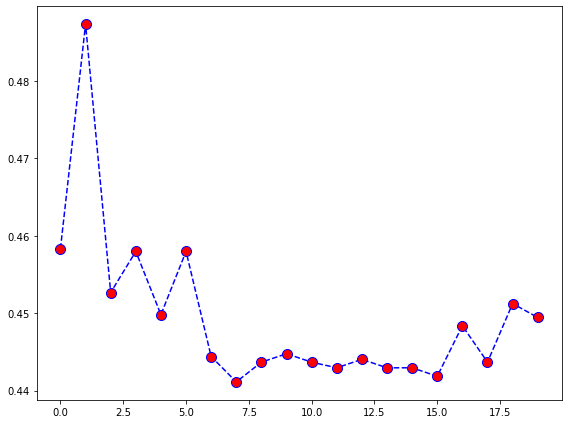

In [83]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(20), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.show()

- At k=8, we get the minimum RMSE value which approximately  0.4411109797071474, and shoots up on further increasing the k value. We can safely say that k=8 will give us the best result in this case

### Applying other classification algorithm

In [84]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 8),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('===========================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.8102613746369797


Confusion matrix : 
 [[1154  363]
 [ 225 1357]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.76      0.80      1517
           1       0.79      0.86      0.82      1582

    accuracy                           0.81      3099
   macro avg       0.81      0.81      0.81      3099
weighted avg       0.81      0.81      0.81      3099



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.829622458857696


Confusion matrix : 
 [[1190  327]
 [ 201 1381]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.78      0.82      1517
           1       0.81      0.87      0.84      1582

    accuracy                           0.83      3099
   macro avg       0.83      0.83      0.83      3099
weighted avg       0.83      0.83      0.

### CrossValidation 

In [86]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 8),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')




Cross Validation Score LogisticRegression() :

Score : [0.75072604 0.73765731 0.7875121  0.80193705 0.8188862 ]
Mean Score : 0.7793437389394533
Std deviation : 0.03065131932357061




Cross Validation Score SVC() :

Score : [0.74152953 0.75072604 0.80929332 0.84067797 0.84842615]
Mean Score : 0.7981306005920834
Std deviation : 0.04453178845509843




Cross Validation Score GaussianNB() :

Score : [0.70764763 0.71732817 0.79138432 0.80677966 0.81840194]
Mean Score : 0.7683083428458919
Std deviation : 0.0464771156313491




Cross Validation Score DecisionTreeClassifier() :

Score : [0.69215876 0.71829622 0.77057115 0.79515738 0.78208232]
Mean Score : 0.7516531693813594
Std deviation : 0.03956945975722701




Cross Validation Score KNeighborsClassifier(n_neighbors=8) :

Score : [0.72216844 0.74007744 0.80058083 0.82905569 0.82033898]
Mean Score : 0.7824442782839423
Std deviation : 0.043279769141983365




Cross Validation Score RandomForestClassifier() :

Score : [0.71732817 0.74588577 

In [87]:
from sklearn.model_selection import GridSearchCV

## Hyper Parameter Tuning : GridSearchCV

In [88]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [89]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.779 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.788 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.795 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.770 total time=   0.0s
[CV 5

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [90]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 'log2',
 'n_estimators': 60}

### Final Model

In [91]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 60, max_depth=40 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))


Accuracy Score :
 0.856405292029687


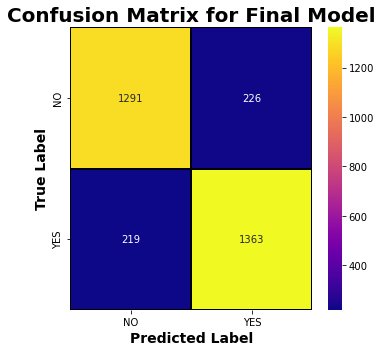

In [92]:
# Lets plot confusion matrix for  FinalModel
Matrix = confusion_matrix(Y_test, y_pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="plasma", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

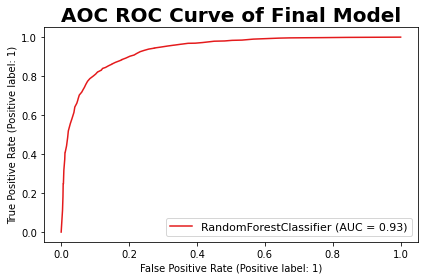

Auc Score :
 0.8562946946823484


In [93]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

### Saving model

In [94]:
import joblib
joblib.dump(Final_mod,'Customer_Churn_Final.pkl')

['Customer_Churn_Final.pkl']

### Predicting the Final Model

In [96]:
# Prediction
prediction = Final_mod.predict(X_test)

In [97]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

,Predicted Values,Actual Values
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
